In [1]:
from importlib import reload
from src.GEFConstructor import CreateGEF
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Comparison Run
ntrs = [120, 150, 180, 240]
atol = 1e-6
rtol = 1e-4
tfin = 250#45
tmid = 120
#GEFComp = CreateGEF("Config/SchwingerGEF+beta25+Mass+OldMix.py")
GEFComp = CreateGEF("Config/ClassicGEF+beta25+Mass.py")
GEFComp.Unitless()
print("GEFComp loaded")

for ntr in ntrs:
    print(ntr)
    GEF1 = CreateGEF("Config/ClassicGEF-Test.py")
    sol1 = GEF1.RunGEF(ntr, tend=tmid, reachNend=True, printstats=False, atol=atol, rtol=rtol)

GEFComp loaded
90
No existing GEF data found. You can specify a file to load using GEF.LoadData or solve the GEF equations using GEF.RunGEF.
The end of inflation was not reached by the solver. Increasing tend by 42.0 to 162.0.
The end of inflation was not reached by the solver. Increasing tend by 113.0 to 275.0.
Elapsed time: 138.7382 seconds
0.13162597357525085
0.07186525232372584
0.06502778529214982
0.12504467489648832
224.10001506693607


67.24483848516873
67.2465502918508


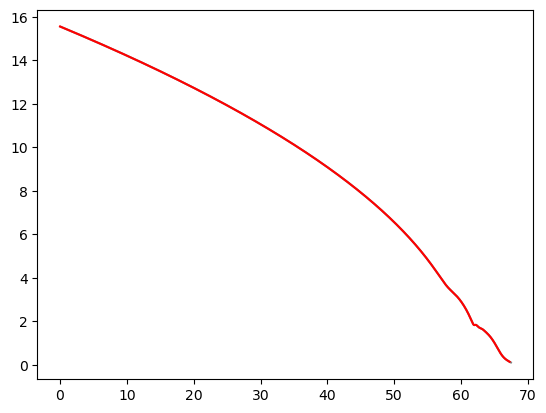

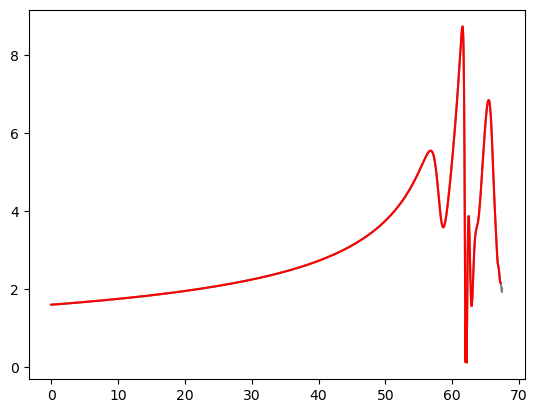

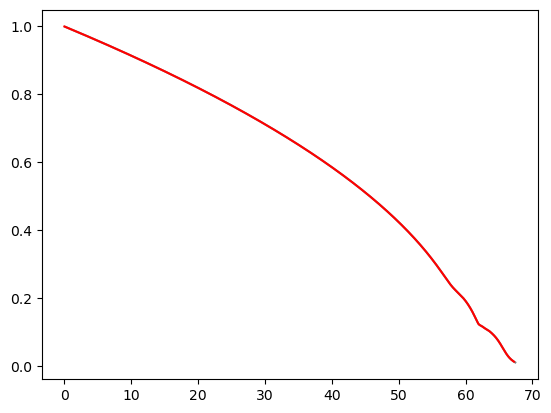

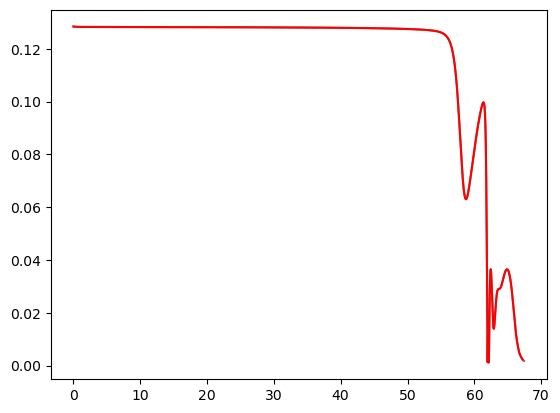

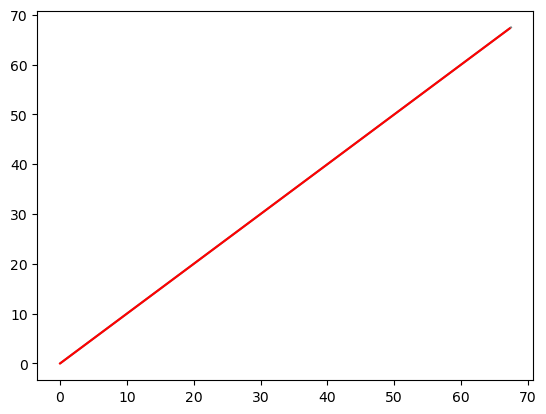

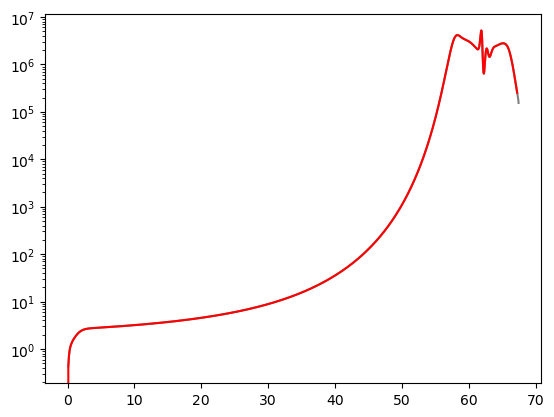

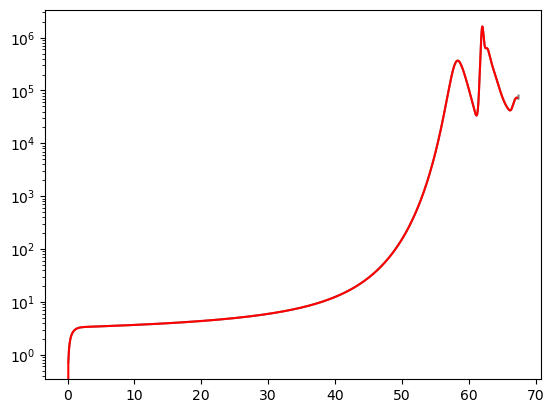

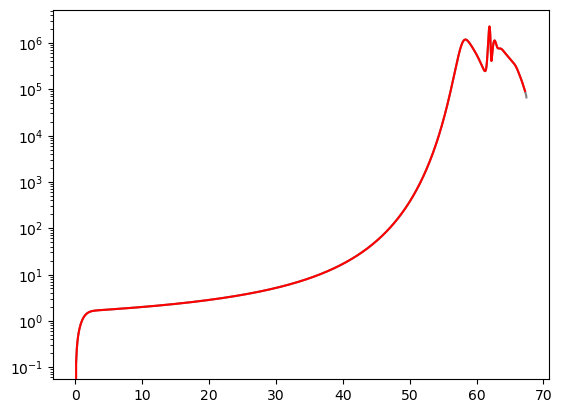

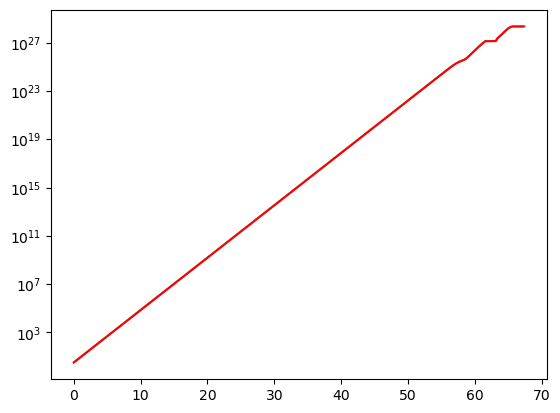

In [3]:
keys = ["phi", "xi", "H", "dphi", "N"]
Nend1 = GEFComp.EndOfInflation()
print(Nend1)
Nend2 = GEF1.Nend
print(Nend2)
for key in keys:
    plt.plot(GEFComp.vals["N"], abs(GEFComp.vals[key]), "gray")
    plt.plot(GEF1.vals["N"], abs(GEF1.vals[key]), "r")
    #plt.vlines(Nend1, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="orange")
    #plt.vlines(Nend2, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="red", linestyle="dashed")
    plt.show()
keys = ["E", "B", "G", "kh"]
for key in keys:
    plt.plot(GEFComp.vals["N"], abs(GEFComp.vals[key]), "gray")
    plt.plot(GEF1.vals["N"], abs(GEF1.vals[key]), "r")
    #plt.vlines(Nend1, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="orange")
    #plt.vlines(Nend2, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="red", linestyle="dashed")
    plt.yscale("log")
    plt.show()
        


30


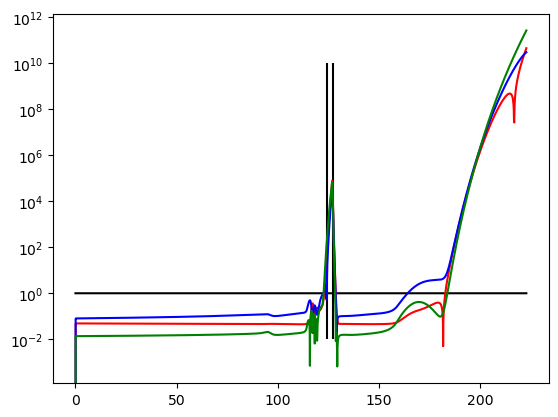

60


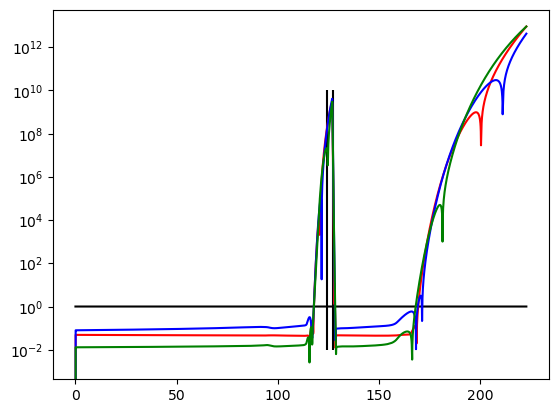

90


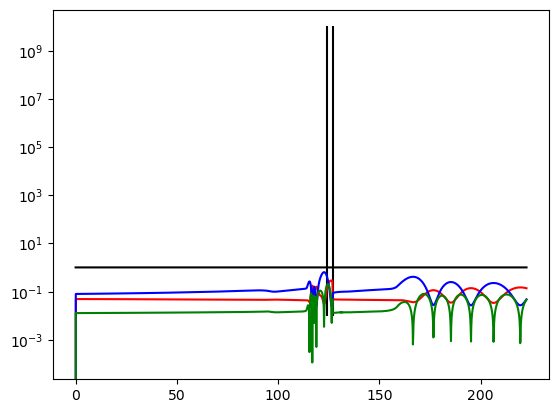

In [3]:
ns = [30, 60, 90]#np.arange(ntrs[0],0, -4)[::-1]

for n in ns:
    print(n)
    plt.vlines([124.3, 127.1],1e-2, 1e10, "k")
    plt.plot(GEF1.vals["t"], np.ones(GEF1.vals["t"].shape), "k")
    plt.plot(GEF1.vals["t"], abs(GEF1.vals["F"][:,n,0])*(n+4), "r")
    plt.plot(GEF1.vals["t"], abs(GEF1.vals["F"][:,n,1])*(n+4), "b")
    plt.plot(GEF1.vals["t"], abs(GEF1.vals["F"][:,n,2])*(n+4), "g")
    plt.yscale("log")
    plt.show()


87.0
88.0
88.0
88.0
89.0
89.0
89.0
90.0
90.0
90.0


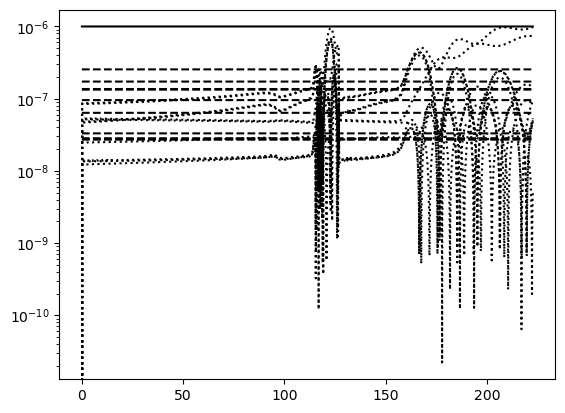

(277, 2228)


In [4]:
plt.plot(sol1.t, atol*np.ones(sol1.t.shape), "k")
for i in range(sol1.y.shape[0]):
    rtolav = rtol*np.average(abs(sol1.y[i,:]))
    rtolbytime = rtol*(abs(sol1.y[i,:]))
    if (rtolav < atol):
        print(np.floor((i-4)/3))      
        plt.plot(sol1.t, rtolav*np.ones(sol1.t.shape), "k--")
        plt.plot(sol1.t, rtolbytime, "k:")
plt.yscale("log")
#plt.ylim(1e-5, 1e5)
plt.show()
print(sol1.y.shape)

In [6]:
G.Unitful()

epsH = -G.vals["Hprime"]/G.vals["H"]**2

fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,10))
ax[0].plot(G.vals["N"], G.vals["H"], "k")
ax[0].set_ylim(0.725e-5,1.61e-5)
yticks = np.round(np.arange(0.8, 1.61, 0.2),1)
ytickslab = [rf"${ytick}$" + r"$\times 10^{-5}$" for ytick in yticks]
ax[0].set_yticks(yticks*1e-5, ytickslab)
yticksmin = np.arange(0.75, 1.65, 0.05)
ax[0].set_yticks(yticksmin*1e-5, minor=True)
ax[0].set_ylabel(r"$H/M_{\rm P}$")

ax[1].plot(G.vals["N"], epsH, "k")
yticks = [5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1]
ytickslab = [r"$5 \times 10^{-4}$", r"$0.001$", r"$0.005$", r"$0.010$", r"$0.050$", r"$0.100$"]

ax[1].set_ylim(4e-4,0.2)
ax[1].set_yscale("log")
ax[1].set_yticks(yticks, ytickslab)
ax[1].set_ylabel(r"$\varepsilon_H$")

ax[2].plot(G.vals["N"], G.vals["xi"], "k")
ax[2].set_ylim(4e-4,0.2)
ax[2].set_yscale("log")

ax[2].set_xticks(np.arange(0, 70, 10))
ax[2].set_xticks(np.arange(0, 70, 2), minor=True)
ax[2].set_xlim(-1, 61)
plt.subplots_adjust(hspace=0)
plt.show()

NameError: name 'G' is not defined